# Project Title: Classifying The Credit Scores

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.0)

pd.options.display.max_rows= 1000
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.2f}'.format

import warnings 
warnings.filterwarnings('ignore')

## Loading The Dataset

In [2]:
df = pd.read_csv('Bank Data.csv')
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,7,11.27,2022.00,Good,809.98,35.03,22 Years and 9 Months,No,49.57,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3,9,13.27,4.00,Good,809.98,33.05,22 Years and 10 Months,No,49.57,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.84,3,4,3,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",-1,4,12.27,4.00,Good,809.98,33.81,NaN,No,49.57,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997


In [3]:
#Lower casing the column names
df.columns = [x.lower() for x in df.columns]
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance'],
      dtype='object')

## Checking Data Quality

In [4]:
#Checking shape of the dataset 
df.shape

(50000, 27)

In [5]:
#Dropping Unnecessary Columns
df.drop(['id', 'customer_id', 'month', 'name', 'ssn','type_of_loan','credit_history_age'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       50000 non-null  object 
 1   occupation                50000 non-null  object 
 2   annual_income             50000 non-null  object 
 3   monthly_inhand_salary     42502 non-null  float64
 4   num_bank_accounts         50000 non-null  int64  
 5   num_credit_card           50000 non-null  int64  
 6   interest_rate             50000 non-null  int64  
 7   num_of_loan               50000 non-null  object 
 8   delay_from_due_date       50000 non-null  int64  
 9   num_of_delayed_payment    46502 non-null  object 
 10  changed_credit_limit      50000 non-null  object 
 11  num_credit_inquiries      48965 non-null  float64
 12  credit_mix                50000 non-null  object 
 13  outstanding_debt          50000 non-null  object 
 14  credit

In [7]:
#Checking for duplicated values
df.duplicated().value_counts()

False    50000
dtype: int64

In [8]:
#Checking is there any null value per column
df.isnull().sum().reset_index().rename(columns={'index':'feature_name', 0:'null_counts'})

,feature_name,null_counts
0,age,0
1,occupation,0
2,annual_income,0
3,monthly_inhand_salary,7498
4,num_bank_accounts,0
5,num_credit_card,0
6,interest_rate,0
7,num_of_loan,0
8,delay_from_due_date,0
9,num_of_delayed_payment,3498


In [9]:
#Checking the number of rows
df.shape[0]

50000

In [10]:
#Head of the so far Customized dataset
df.head()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,23,Scientist,19114.12,1824.84,3,4,3,4,3,7,11.27,2022.00,Good,809.98,35.03,No,49.57,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,24,Scientist,19114.12,1824.84,3,4,3,4,3,9,13.27,4.00,Good,809.98,33.05,No,49.57,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,24,Scientist,19114.12,1824.84,3,4,3,4,-1,4,12.27,4.00,Good,809.98,33.81,No,49.57,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,24_,Scientist,19114.12,NaN,3,4,3,4,4,5,11.27,4.00,Good,809.98,32.43,No,49.57,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,28,_______,34847.84,3037.99,2,4,6,1,3,1,5.42,5.00,Good,605.03,25.93,No,18.82,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [11]:
#Tail of the so far Customized dataset
df.tail()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
49995,4975,Architect,20002.88,1929.91,10,8,29,5,33,25,18.31,12.00,_,3571.7,34.78,Yes,60.96,146.48632477751087,Low_spent_Small_value_payments,275.53956951573343
49996,25,Mechanic,39628.99,NaN,4,6,7,2_,20,NaN,11.5,7.00,Good,502.38,27.76,NM,35.10,181.44299902757518,Low_spent_Small_value_payments,409.39456169535066
49997,25,Mechanic,39628.99,3359.42,4,6,7,2,23,5,13.5,7.00,Good,502.38,36.86,No,35.10,__10000__,Low_spent_Large_value_payments,349.7263321025098
49998,25,Mechanic,39628.99,NaN,4,6,7,2_,21,6_,11.5,7.00,Good,502.38,39.14,No,35.10,97.59857973344877,High_spent_Small_value_payments,463.23898098947717
49999,25,Mechanic,39628.99,3359.42,4,6,7,2,22,5,11.5,7.00,_,502.38,34.11,No,35.10,220.45787812168732,Low_spent_Medium_value_payments,360.37968260123847


### Checking the unique values per column

In [12]:
#For age
df['age'].value_counts()

39       1493
32       1440
44       1428
22       1422
35       1414
37       1397
27       1382
20       1374
29       1368
26       1348
28       1344
30       1341
41       1338
25       1325
36       1318
24       1318
33       1280
19       1277
42       1277
38       1266
31       1265
21       1260
34       1236
23       1213
45       1208
40       1196
43       1193
46       1127
18        796
15        744
16        731
17        720
53        657
50        653
55        647
49        644
47        624
54        623
51        610
52        593
48        593
56        498
-500      464
14        181
32_        89
36_        82
19_        78
39_        77
42_        76
27_        75
38_        74
41_        73
26_        73
29_        73
44_        72
28_        71
22_        71
33_        71
25_        70
30_        69
35_        69
31_        67
34_        65
37_        64
24_        63
45_        63
43_        62
46_        62
21_        61
23_        60
20_        58
40_   

In [13]:
#For Occupation 
df['occupation'].value_counts()

_______          3438
Lawyer           3324
Engineer         3212
Architect        3195
Mechanic         3168
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: occupation, dtype: int64

In [14]:
#For Annual Income annual_income
df['annual_income'].value_counts()

109945.32    8
17816.75     8
95596.35     8
72524.2      8
9141.63      8
            ..
28056.94_    1
28286.24_    1
1716646.0    1
10622.485    1
62160.87_    1
Name: annual_income, Length: 16121, dtype: int64

In [15]:
#For monthly inhand salary
df['monthly_inhand_salary'].value_counts()

1315.56     8
6639.56     7
2295.06     7
6082.19     7
536.43      7
           ..
12386.97    1
5993.87     1
6763.33     1
7729.70     1
2312.78     1
Name: monthly_inhand_salary, Length: 12793, dtype: int64

In [16]:
#For num_bank_accounts         
df['num_bank_accounts'].value_counts()

 6       6504
 7       6408
 8       6387
 4       6100
 5       6068
 3       5955
 9       2738
 10      2599
 1       2253
 0       2166
 2       2152
 11        19
-1         16
 1542       4
 74         3
 1305       3
 1434       3
 616        3
 915        3
 213        3
 968        3
 1563       3
 1441       2
 568        2
 64         2
 1492       2
 681        2
 590        2
 1585       2
 931        2
 717        2
 1518       2
 21         2
 182        2
 398        2
 242        2
 665        2
 151        2
 1692       2
 1442       2
 1220       2
 1038       2
 826        2
 741        2
 70         2
 164        2
 662        2
 600        2
 954        2
 766        2
 428        2
 1411       2
 1513       2
 1101       2
 1540       2
 422        2
 1522       2
 1087       2
 1488       2
 1292       2
 985        2
 367        2
 556        2
 1578       2
 620        2
 708        2
 1382       2
 983        2
 1246       2
 456        2
 1717       2
 1416 

In [17]:
#For num_credit_card
df['num_credit_card'].value_counts()

5       9210
7       8271
6       8243
4       7072
3       6539
8       2497
10      2405
9       2333
2       1131
1       1063
11        41
0         16
571        5
1203       5
873        4
720        4
1345       4
715        4
51         4
910        4
402        4
1250       4
1063       4
284        4
176        4
195        4
591        4
537        4
211        4
338        4
41         4
783        3
533        3
462        3
209        3
1260       3
49         3
197        3
868        3
544        3
610        3
683        3
574        3
856        3
79         3
1052       3
1190       3
102        3
1447       3
119        3
1392       3
241        3
149        3
98         3
654        3
883        3
1045       3
926        3
1191       3
256        3
877        3
465        3
142        3
355        3
1180       3
1462       3
721        3
592        3
702        3
1091       3
408        3
404        3
1150       3
487        3
778        3
1384       3
1171       3

In [18]:
#For interest_rate
df['interest_rate'].value_counts()

8       2503
5       2500
6       2368
12      2288
10      2259
9       2253
7       2250
11      2198
18      2052
15      1992
20      1961
17      1906
16      1867
19      1810
3       1388
1       1344
4       1287
2       1245
13      1187
14      1122
32       874
22       860
24       848
23       847
30       846
29       833
28       815
27       808
25       790
21       775
26       749
34       744
33       734
31       731
4907       3
496        3
5513       2
3250       2
2108       2
1447       2
4675       2
1706       2
1960       2
5759       2
1381       2
4356       2
1962       2
4403       2
1284       2
2381       2
679        2
113        2
3670       2
840        2
423        2
3866       2
2520       2
447        2
1399       2
2911       2
2644       2
648        2
3877       2
507        2
1163       2
1098       2
436        2
2857       2
5066       2
3646       2
4560       2
3505       2
504        2
5626       2
4854       2
2953       2
3747       2

In [19]:
#For number of loans
df['num_of_loan'].value_counts()

2        7173
3        7114
4        6982
0        5163
1        5029
6        3707
7        3483
5        3437
-100     1974
9        1746
8        1506
3_        400
4_        386
2_        342
0_        283
1_        266
7_        197
6_        195
5_        180
9_         91
8_         88
1237        2
602         2
385         2
106         2
1024        2
452         2
286         2
505         2
1475        2
463         2
198         2
1445        2
140         2
1292        2
641         2
263         2
961         1
1114        1
255         1
1207        1
1444        1
257         1
326         1
295         1
631         1
273         1
441         1
519_        1
1187        1
99          1
97          1
1149        1
1148        1
464         1
1329        1
142         1
453         1
1072        1
734_        1
393         1
928         1
838         1
1109        1
1429        1
1300        1
547         1
1385        1
950         1
1153        1
539         1
1240  

In [20]:
#For delay_from_due_date
df['delay_from_due_date'].value_counts()

 13    1761
 15    1759
 8     1680
 9     1656
 10    1645
 14    1636
 12    1625
 7     1587
 6     1584
 11    1573
 5     1495
 18    1335
 19    1310
 27    1308
 20    1300
 25    1289
 16    1284
 21    1230
 26    1226
 28    1223
 29    1223
 24    1214
 17    1183
 23    1165
 22    1135
 30    1115
 3      848
 4      825
 2      669
 1      668
 0      626
 32     402
 31     397
 33     381
 48     363
 47     321
 34     320
 54     308
 41     307
 38     306
 42     303
 52     302
 44     299
 35     298
 55     296
 53     291
 56     283
 58     282
 62     279
 36     279
 40     272
 61     271
 50     270
 45     269
 57     269
 49     269
 37     267
 60     259
 46     258
 43     253
 39     250
 59     250
 51     248
-1      101
-2       71
-3       59
-4       49
 64      33
 65      30
 63      21
-5       18
 66      12
 67       7
Name: delay_from_due_date, dtype: int64

In [21]:
#For num_of_delayed_payment
df['num_of_delayed_payment'].value_counts()

19       2622
15       2594
18       2570
16       2548
17       2545
10       2517
12       2483
11       2440
20       2422
9        2365
8        2352
14       2007
13       2000
21       1315
7        1140
22       1116
6        1076
5        1036
23       1011
3         939
4         887
2         872
24        836
1         814
25        813
0         784
26        147
-1        123
27        104
-2        103
20_        96
17_        91
16_        89
19_        85
12_        80
15_        80
8_         78
9_         75
10_        74
28         64
11_        64
18_        61
13_        61
14_        59
-3         49
7_         46
6_         38
21_        35
1_         35
2_         34
25_        32
22_        32
23_        28
3_         28
0_         27
5_         27
4_         22
24_        20
-2_         6
-1_         4
2606        3
26_         3
549         2
265         2
1377        2
2595        2
861         2
762         2
2649        2
538         2
688         2
3064  

In [22]:
#For changed_credit_limit
df['changed_credit_limit'].value_counts()

_                      1059
11.5                     70
11.32                    63
7.01                     60
7.35                     60
                       ... 
-0.6099999999999999       1
21.61                     1
12.010000000000002        1
0.43000000000000016       1
29.17                     1
Name: changed_credit_limit, Length: 3927, dtype: int64

In [23]:
#For num_credit_inquiries
df['num_credit_inquiries'].value_counts()

5.00       4709
4.00       4402
6.00       4375
7.00       4295
8.00       3922
9.00       3523
3.00       3466
11.00      2996
10.00      2982
12.00      2585
2.00       2454
13.00      2065
1.00       1747
14.00      1394
0.00       1102
15.00      1063
16.00       651
17.00       388
2326.00       3
2338.00       3
1431.00       3
1823.00       3
2019.00       3
1856.00       3
1785.00       3
2179.00       2
1984.00       2
1902.00       2
824.00        2
1990.00       2
2013.00       2
1808.00       2
951.00        2
593.00        2
881.00        2
396.00        2
1879.00       2
695.00        2
1551.00       2
323.00        2
151.00        2
2034.00       2
140.00        2
1138.00       2
2328.00       2
801.00        2
1228.00       2
1694.00       2
2292.00       2
1416.00       2
906.00        2
1448.00       2
621.00        2
582.00        2
678.00        2
2515.00       2
301.00        2
2051.00       2
1883.00       2
1071.00       2
828.00        2
1996.00       2
1632.00 

In [24]:
#For credit_mix
df['credit_mix'].value_counts()

Standard    18379
Good        12260
_            9805
Bad          9556
Name: credit_mix, dtype: int64

In [25]:
#For outstanding_debt
df['outstanding_debt'].value_counts()

1109.03     12
1360.45     12
460.46      12
1151.7      12
1319.87      8
            ..
1443.78_     1
3534.9_      1
4320.49_     1
2982.66_     1
3223.66_     1
Name: outstanding_debt, Length: 12685, dtype: int64

In [26]:
#For credit_utilization_ratio
df['credit_utilization_ratio'].value_counts()

35.03    1
24.96    1
32.55    1
35.64    1
27.28    1
        ..
40.73    1
33.00    1
26.44    1
24.34    1
34.11    1
Name: credit_utilization_ratio, Length: 50000, dtype: int64

In [27]:
#For payment_of_min_amount
df['payment_of_min_amount'].value_counts()

Yes    26158
No     17849
NM      5993
Name: payment_of_min_amount, dtype: int64

In [28]:
#For total_emi_per_month
df['total_emi_per_month'].value_counts()

0.00        5002
49.57          4
16.94          4
420.20         4
550.68         4
            ... 
65628.00       1
92.40          1
191.30         1
61274.00       1
50090.00       1
Name: total_emi_per_month, Length: 13144, dtype: int64

In [29]:
#For amount_invested_monthly
df['amount_invested_monthly'].value_counts()

__10000__             2175
0.0                    106
236.64268203272135       1
160.0977166999812        1
320.4566446914704        1
                      ... 
197.2171314766754        1
366.23148415217315       1
34.89940643392877        1
256.90830529853173       1
220.45787812168732       1
Name: amount_invested_monthly, Length: 45450, dtype: int64

In [30]:
#For payment_behaviour
df['payment_behaviour'].value_counts()

Low_spent_Small_value_payments      12694
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
High_spent_Small_value_payments      5651
Low_spent_Large_value_payments       5252
!@9#%8                               3800
Name: payment_behaviour, dtype: int64

In [31]:
#For monthly balance 
df['monthly_balance'].value_counts()

__-333333333333333333333333333__    6
186.26670208571772                  1
223.40782977501067                  1
305.43786598764547                  1
389.53754307843735                  1
                                   ..
421.25686767906984                  1
194.44026842190848                  1
299.957837924029                    1
375.897928536186                    1
360.37968260123847                  1
Name: monthly_balance, Length: 49433, dtype: int64

### Removing & Replacing unwanted signs 

In [33]:
#For age, annual_income, num_of_loan, outstanding_debt, monthly_balance

def filter_general(value):
    if '-' in str(value):
        return str(value).split('-')[1]
    elif '_' in str(value):
        return str(value).split('_')[0]
    else:
        return str(value)

df.drop(df[df["monthly_balance"]=='__-333333333333333333333333333__ '].index, inplace=True)
for i in ['age', 'annual_income', 'num_of_loan', 'outstanding_debt', 'monthly_balance']:
    df[i]=df[i].apply(filter_general)
    df[i]=df[i].astype(np.float64)
    print(i+" successfully cleaned.")

age successfully cleaned.
annual_income successfully cleaned.
num_of_loan successfully cleaned.
outstanding_debt successfully cleaned.
monthly_balance successfully cleaned.


In [34]:
#For occupation 
df["occupation"] = df["occupation"].replace('_______',np.nan)
df["occupation"] = df["occupation"].fillna(np.random.choice(pd.Series(['Scientist','Teacher','Engineer','Enterpreneur',
                                                                      'Developer', 'Lawyer', 'Media_Manager','Doctor','Journalist',
                                                                     'Accountant','Musician','Mechanic','Writer','Architect'])))
df['occupation'].value_counts()

Mechanic         6606
Lawyer           3324
Engineer         3212
Architect        3195
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: occupation, dtype: int64

In [35]:
#For amount_invested_monthly
def amount_invested_monthly(col):
    if "__" in str(col):
        return str(col).split("__")[1]
    else:
        return str(col)
df["amount_invested_monthly"]= df["amount_invested_monthly"].apply(amount_invested_monthly)
df["amount_invested_monthly"]= df["amount_invested_monthly"].astype("float")

In [36]:
#For monthly_inhand_salary, num_credit_inquiries, amount_invested_monthly, monthly_balance
for i in ['monthly_inhand_salary','num_credit_inquiries','amount_invested_monthly','monthly_balance']:
    df[i].fillna(df[i].median(), inplace=True)

In [37]:
#For number of delayed payment column
def filter_delayed_payments(value):
    if "__" in str(value):
        return str(value).split("__")[1]
    elif "_" in str(value):
        return str(value).replace("_","")
    elif str(value)== '_':
        return str(value)
    else:
        return str(value)
df['num_of_delayed_payment']= df['num_of_delayed_payment'].apply(filter_delayed_payments)
df['num_of_delayed_payment']= df['num_of_delayed_payment'].astype(np.float64)
df['num_of_delayed_payment']

0        7.00
1        9.00
2        4.00
3        5.00
4        1.00
         ... 
49995   25.00
49996     NaN
49997    5.00
49998    6.00
49999    5.00
Name: num_of_delayed_payment, Length: 50000, dtype: float64

In [38]:
#For changed_credit_limit

def split_value(x):
    try:
        return x.split("-")[-1]
    except IndexError:
        return x
df['changed_credit_limit'] = df['changed_credit_limit'].apply(split_value)
df['changed_credit_limit'] = pd.to_numeric(df['changed_credit_limit'], errors="coerce") 

In [39]:
#For credit_mix
df["credit_mix"] = df["credit_mix"].replace('_',np.nan)
df["credit_mix"] = df["credit_mix"].fillna(np.random.choice(pd.Series(['Standard', 'Good', 'Bad'])))
df['credit_mix'].value_counts()

Bad         19361
Standard    18379
Good        12260
Name: credit_mix, dtype: int64

In [40]:
#For payment_of_min_amount
df['payment_of_min_amount'] = df['payment_of_min_amount'].replace('NM', np.nan)
df['payment_of_min_amount'] = df['payment_of_min_amount'].fillna(np.random.choice(pd.Series(['Yes','No'])))

In [41]:
#For payment_behaviour
df['payment_behaviour'] = df['payment_behaviour'].replace('!@9#%8', np.nan)
df['payment_behaviour'] = df['payment_behaviour'].fillna(np.random.choice(pd.Series(['Low_spent_Small_value_payments','High_spent_Medium_value_payments',
                                                                                    'High_spent_Large_value_payments','Low_spent_Medium_value_payments',
                                                                                    'High_spent_Small_value_payments','Low_spent_Large_value_payments'])))

In [42]:
df.tail()

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,credit_mix,outstanding_debt,credit_utilization_ratio,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
49995,4975.00,Architect,20002.88,1929.91,10,8,29,5.00,33,25.00,18.31,12.00,Bad,3571.70,34.78,Yes,60.96,146.49,Low_spent_Small_value_payments,275.54
49996,25.00,Mechanic,39628.99,3086.30,4,6,7,2.00,20,NaN,11.50,7.00,Good,502.38,27.76,Yes,35.10,181.44,Low_spent_Small_value_payments,409.39
49997,25.00,Mechanic,39628.99,3359.42,4,6,7,2.00,23,5.00,13.50,7.00,Good,502.38,36.86,No,35.10,10000.00,Low_spent_Large_value_payments,349.73
49998,25.00,Mechanic,39628.99,3086.30,4,6,7,2.00,21,6.00,11.50,7.00,Good,502.38,39.14,No,35.10,97.60,High_spent_Small_value_payments,463.24
49999,25.00,Mechanic,39628.99,3359.42,4,6,7,2.00,22,5.00,11.50,7.00,Bad,502.38,34.11,No,35.10,220.46,Low_spent_Medium_value_payments,360.38


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       50000 non-null  float64
 1   occupation                50000 non-null  object 
 2   annual_income             50000 non-null  float64
 3   monthly_inhand_salary     50000 non-null  float64
 4   num_bank_accounts         50000 non-null  int64  
 5   num_credit_card           50000 non-null  int64  
 6   interest_rate             50000 non-null  int64  
 7   num_of_loan               50000 non-null  float64
 8   delay_from_due_date       50000 non-null  int64  
 9   num_of_delayed_payment    46502 non-null  float64
 10  changed_credit_limit      48941 non-null  float64
 11  num_credit_inquiries      50000 non-null  float64
 12  credit_mix                50000 non-null  object 
 13  outstanding_debt          50000 non-null  float64
 14  credit

## Exploratory Data Analysis (EDA)

In [44]:
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(include='number')

### EDA for Catagorical Data

In [45]:
df_cat.describe().T

,count,unique,top,freq
occupation,50000,15,Mechanic,6606
credit_mix,50000,3,Bad,19361
payment_of_min_amount,50000,2,Yes,32151
payment_behaviour,50000,6,Low_spent_Small_value_payments,12694


In [46]:
for cat_col in df_cat:
    print(df_cat[cat_col].value_counts())
    print('\n--------------')

Mechanic         6606
Lawyer           3324
Engineer         3212
Architect        3195
Developer        3146
Accountant       3133
Media_Manager    3130
Scientist        3104
Teacher          3103
Entrepreneur     3103
Journalist       3037
Doctor           3027
Manager          3000
Musician         2947
Writer           2933
Name: occupation, dtype: int64

--------------
Bad         19361
Standard    18379
Good        12260
Name: credit_mix, dtype: int64

--------------
Yes    32151
No     17849
Name: payment_of_min_amount, dtype: int64

--------------
Low_spent_Small_value_payments      12694
High_spent_Small_value_payments      9451
High_spent_Medium_value_payments     8922
High_spent_Large_value_payments      6844
Low_spent_Medium_value_payments      6837
Low_spent_Large_value_payments       5252
Name: payment_behaviour, dtype: int64

--------------


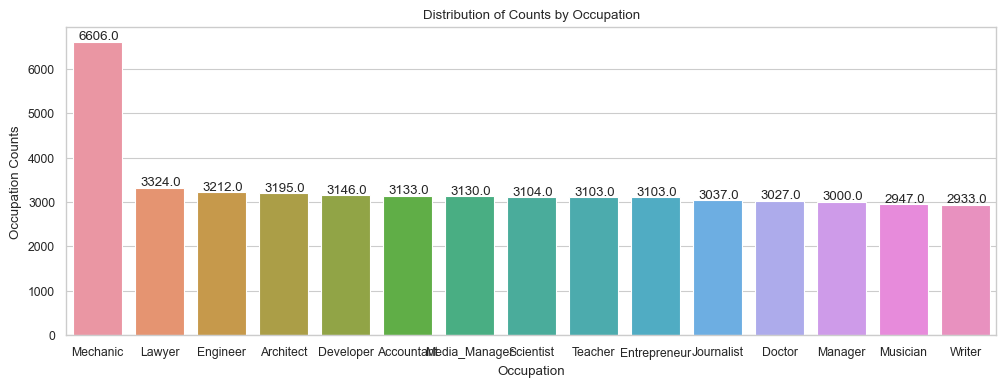

In [47]:
#EDA for Occupation

plt.figure(figsize=(12,4))
ax = sns.countplot(x='occupation', data= df_cat, order = df['occupation'].value_counts().index)
plt.title('Distribution of Counts by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Occupation Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

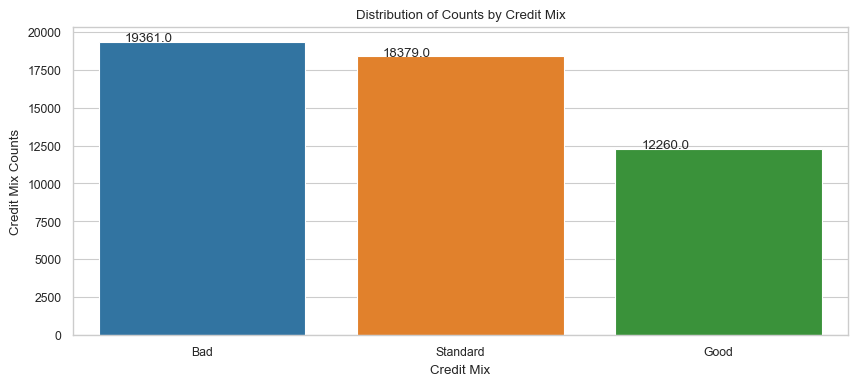

In [48]:
#EDA for Credit Mix

plt.figure(figsize=(10,4))
ax = sns.countplot(x='credit_mix', data= df_cat, order = df['credit_mix'].value_counts().index)
plt.title('Distribution of Counts by Credit Mix')
plt.xlabel('Credit Mix')
plt.ylabel('Credit Mix Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

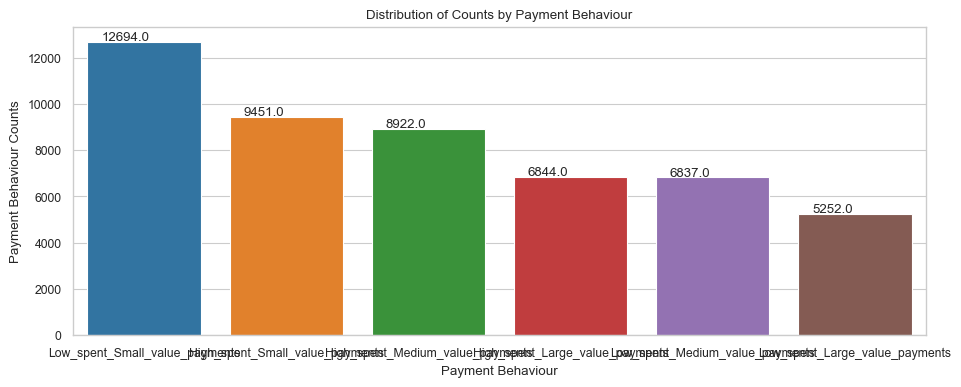

In [49]:
#EDA For Payment Behaviour
plt.figure(figsize=(11,4))
ax = sns.countplot(x='payment_behaviour', data= df_cat, order = df['payment_behaviour'].value_counts().index)
plt.title('Distribution of Counts by Payment Behaviour')
plt.xlabel('Payment Behaviour')
plt.ylabel('Payment Behaviour Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

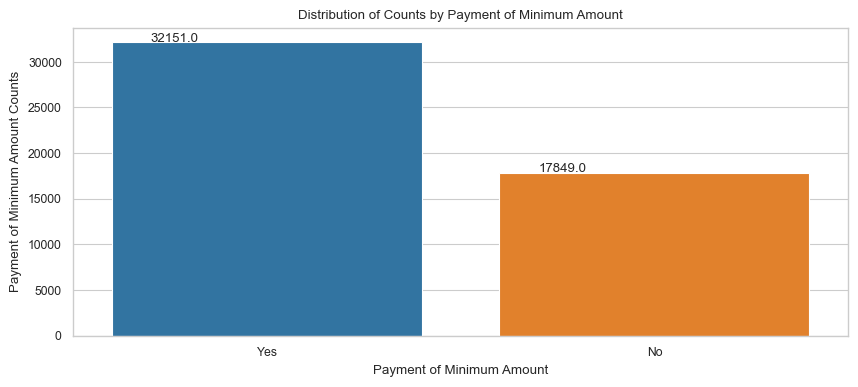

In [50]:
#EDA Payment of Minimum Amount
plt.figure(figsize=(10,4))
ax = sns.countplot(x='payment_of_min_amount', data=df_cat, order = df['payment_of_min_amount'].value_counts().iloc[:20].index)
plt.title('Distribution of Counts by Payment of Minimum Amount')
plt.xlabel('Payment of Minimum Amount')
plt.ylabel('Payment of Minimum Amount Counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

### EDA for Numerical Data

In [51]:
#statistical summary
df_num.describe()

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,46502.00,48941.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,118.99,166334.20,4017.69,16.84,22.92,68.77,11.30,21.05,30.89,10.46,29.60,1426.22,32.28,1491.30,618.67,39999999999999991611392.00
std,678.13,1351965.47,2952.48,116.40,129.31,451.60,65.48,14.86,221.51,6.65,194.96,1155.13,5.11,8595.65,2009.47,3651301134299530140844032.00
min,14.00,7005.93,303.65,-1.00,0.00,1.00,0.00,-5.00,-3.00,0.00,0.00,0.23,20.51,0.00,0.00,0.10
25%,25.00,19453.33,1794.30,3.00,4.00,8.00,2.00,10.00,9.00,5.36,4.00,566.07,28.06,32.22,77.03,271.12
50%,34.00,37577.82,3086.30,6.00,5.00,13.00,3.00,18.00,14.00,9.41,7.00,1166.15,32.28,74.73,135.59,337.01
75%,43.00,72817.02,5338.97,7.00,7.00,20.00,6.00,28.00,18.00,14.80,10.00,1945.96,36.47,176.16,255.92,468.66
max,8688.00,24137255.00,15204.63,1798.00,1499.00,5799.00,1496.00,67.00,4399.00,36.65,2593.00,4998.07,48.54,82398.00,10000.00,333333333333333314856026112.00


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'monthly_inhand_salary'}>,
        <Axes: title={'center': 'num_bank_accounts'}>],
       [<Axes: title={'center': 'num_credit_card'}>,
        <Axes: title={'center': 'interest_rate'}>,
        <Axes: title={'center': 'num_of_loan'}>,
        <Axes: title={'center': 'delay_from_due_date'}>],
       [<Axes: title={'center': 'num_of_delayed_payment'}>,
        <Axes: title={'center': 'changed_credit_limit'}>,
        <Axes: title={'center': 'num_credit_inquiries'}>,
        <Axes: title={'center': 'outstanding_debt'}>],
       [<Axes: title={'center': 'credit_utilization_ratio'}>,
        <Axes: title={'center': 'total_emi_per_month'}>,
        <Axes: title={'center': 'amount_invested_monthly'}>,
        <Axes: title={'center': 'monthly_balance'}>]], dtype=object)

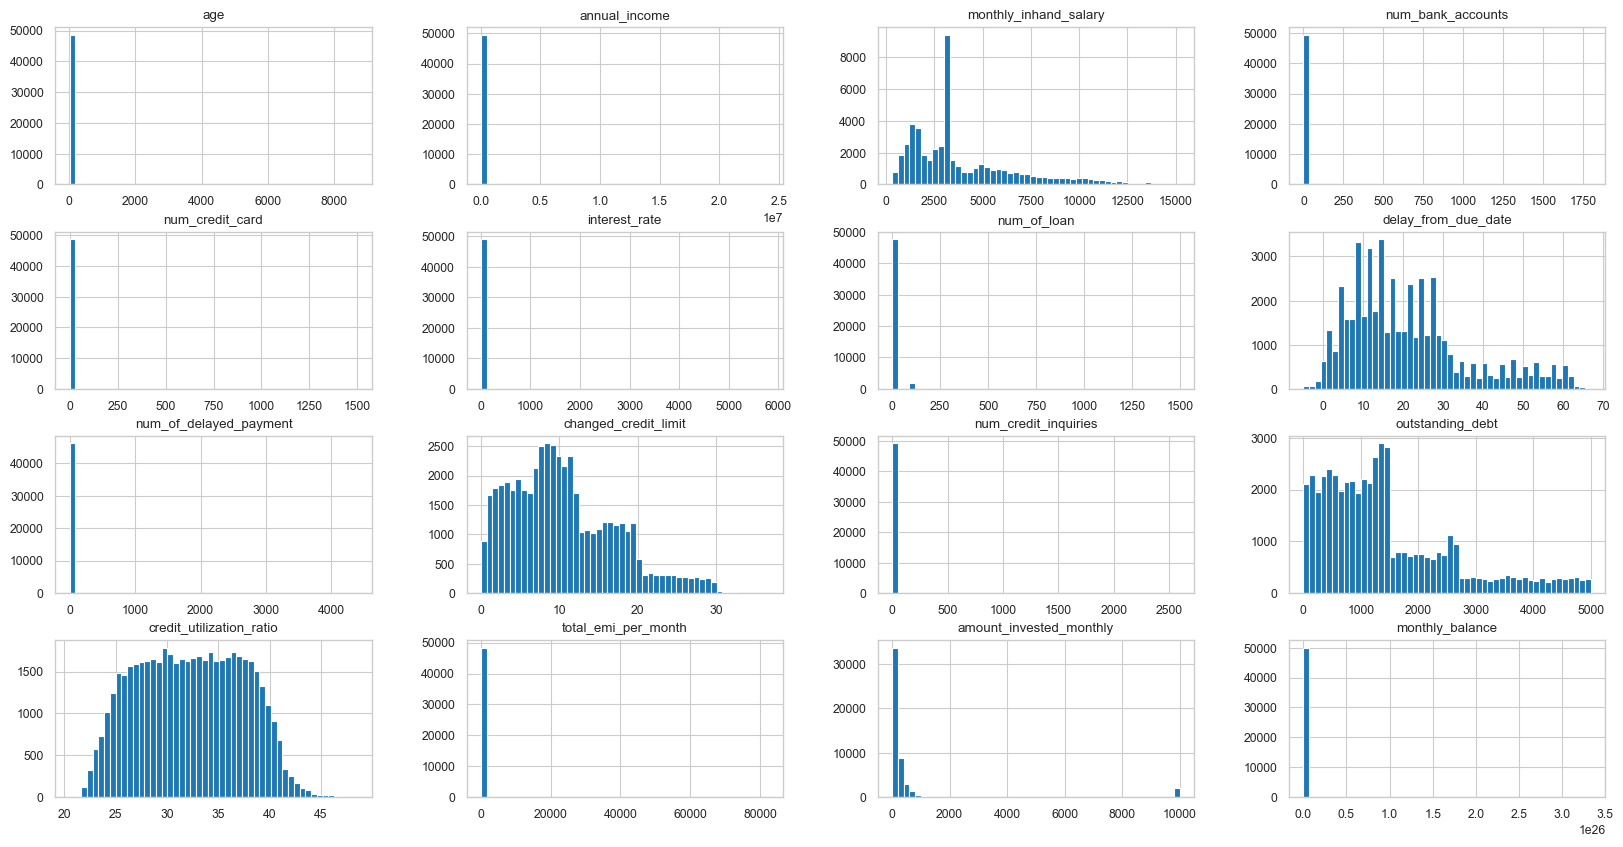

In [52]:
#Histogram
df_num.hist(bins=50, figsize=[20,10])

In [53]:
#Correlation Metrix
corrmat= df_num.corr()
corrmat

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,total_emi_per_month,amount_invested_monthly,monthly_balance
age,1.00,-0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00
annual_income,-0.01,1.00,0.03,0.00,-0.00,0.00,0.01,-0.01,-0.00,-0.01,0.00,-0.01,-0.00,-0.00,0.01,-0.00
monthly_inhand_salary,0.00,0.03,1.00,-0.01,-0.00,-0.01,-0.00,-0.23,-0.01,-0.16,-0.00,-0.25,0.15,0.02,0.05,0.00
num_bank_accounts,0.01,0.00,-0.01,1.00,0.01,0.00,-0.00,0.02,0.00,0.01,0.00,0.01,-0.01,0.00,-0.01,-0.00
num_credit_card,0.00,-0.00,-0.00,0.01,1.00,0.00,-0.00,0.01,-0.00,0.01,0.00,0.01,0.00,0.01,-0.01,-0.00
interest_rate,0.00,0.00,-0.01,0.00,0.00,1.00,0.00,0.01,0.00,0.01,-0.01,0.01,-0.00,0.01,-0.00,-0.00
num_of_loan,0.00,0.01,-0.00,-0.00,-0.00,0.00,1.00,0.02,0.00,0.01,-0.00,0.02,-0.00,-0.01,0.01,-0.00
delay_from_due_date,0.00,-0.01,-0.23,0.02,0.01,0.01,0.02,1.00,0.02,0.30,0.00,0.57,-0.07,0.00,-0.01,-0.00
num_of_delayed_payment,0.00,-0.00,-0.01,0.00,-0.00,0.00,0.00,0.02,1.00,0.02,-0.01,0.02,-0.00,-0.00,-0.00,-0.00
changed_credit_limit,0.00,-0.01,-0.16,0.01,0.01,0.01,0.01,0.30,0.02,1.00,0.01,0.46,-0.05,-0.00,-0.01,-0.01


<Axes: >

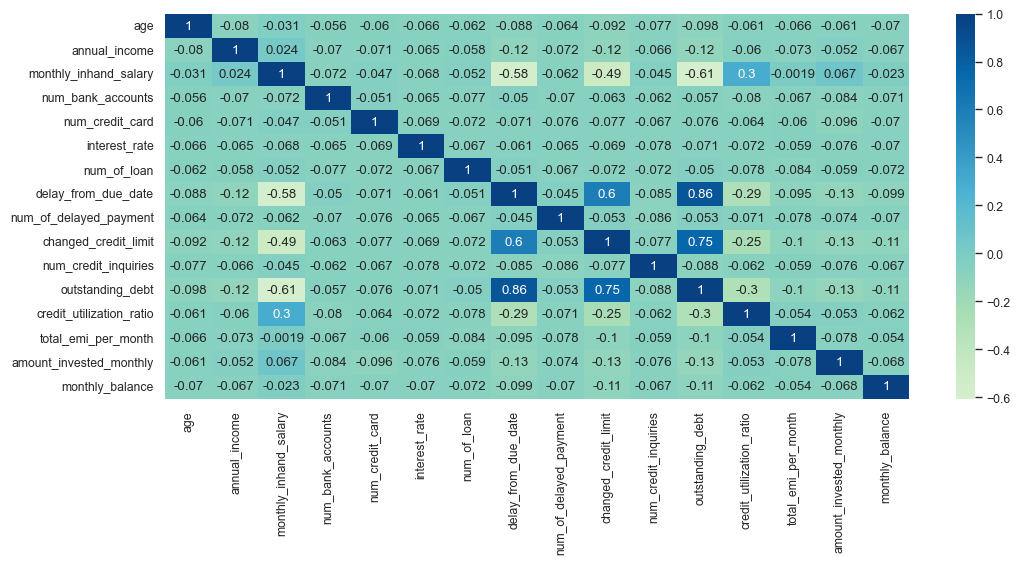

In [54]:
#Heatmap 
plt.figure(figsize=(12,5))
sns.heatmap(corrmat.corr(), cmap="GnBu", center=0, annot=True)

In [55]:
#Separating numerical and catagorical columns 
numeric_cols = df.select_dtypes(exclude="object").columns
cat_cols = df.select_dtypes(include="object").columns
numeric_cols

Index(['age', 'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio',
       'total_emi_per_month', 'amount_invested_monthly', 'monthly_balance'],
      dtype='object')

In [56]:
cat_cols

Index(['occupation', 'credit_mix', 'payment_of_min_amount',
       'payment_behaviour'],
      dtype='object')

In [57]:
#Variance Inflation Factor (VIF) for each numerical feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = df[numeric_cols]
vif_df = df[numeric_cols].fillna(vif_df.mean())

vif_data = pd.DataFrame()
vif_data["feature"] = vif_df.columns
vif_data["VIF"] = [variance_inflation_factor(vif_df.values, i) for i in range(len(vif_df.columns))]
vif_data.head(17)

,feature,VIF
0,age,0.97
1,annual_income,0.99
2,monthly_inhand_salary,0.35
3,num_bank_accounts,0.98
4,num_credit_card,0.97
5,interest_rate,0.98
6,num_of_loan,0.97
7,delay_from_due_date,0.33
8,num_of_delayed_payment,0.98
9,changed_credit_limit,0.28


In [58]:
#Dropping column that has VIF less than 0.5
df= df.drop(['monthly_inhand_salary', 'delay_from_due_date', 'changed_credit_limit', 'outstanding_debt','credit_utilization_ratio'], axis=1)
df.head()

,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,23.00,Scientist,19114.12,3,4,3,4.00,7.00,2022.00,Good,No,49.57,236.64,Low_spent_Small_value_payments,186.27
1,24.00,Scientist,19114.12,3,4,3,4.00,9.00,4.00,Good,No,49.57,21.47,High_spent_Medium_value_payments,361.44
2,24.00,Scientist,19114.12,3,4,3,4.00,4.00,4.00,Good,No,49.57,148.23,Low_spent_Medium_value_payments,264.68
3,24.00,Scientist,19114.12,3,4,3,4.00,5.00,4.00,Good,No,49.57,39.08,High_spent_Medium_value_payments,343.83
4,28.00,Mechanic,34847.84,2,4,6,1.00,1.00,5.00,Good,No,18.82,39.68,High_spent_Large_value_payments,485.30


In [59]:
#Checking for current null values
df.isnull().sum().reset_index().rename(columns={'index':'feature_name', 0:'null_counts'})

,feature_name,null_counts
0,age,0
1,occupation,0
2,annual_income,0
3,num_bank_accounts,0
4,num_credit_card,0
5,interest_rate,0
6,num_of_loan,0
7,num_of_delayed_payment,3498
8,num_credit_inquiries,0
9,credit_mix,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      50000 non-null  float64
 1   occupation               50000 non-null  object 
 2   annual_income            50000 non-null  float64
 3   num_bank_accounts        50000 non-null  int64  
 4   num_credit_card          50000 non-null  int64  
 5   interest_rate            50000 non-null  int64  
 6   num_of_loan              50000 non-null  float64
 7   num_of_delayed_payment   46502 non-null  float64
 8   num_credit_inquiries     50000 non-null  float64
 9   credit_mix               50000 non-null  object 
 10  payment_of_min_amount    50000 non-null  object 
 11  total_emi_per_month      50000 non-null  float64
 12  amount_invested_monthly  50000 non-null  float64
 13  payment_behaviour        50000 non-null  object 
 14  monthly_balance       

In [61]:
#Filling num_of_delayed_payment with mode 
df["num_of_delayed_payment"].fillna(df["num_of_delayed_payment"].mode().iloc[0], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      50000 non-null  float64
 1   occupation               50000 non-null  object 
 2   annual_income            50000 non-null  float64
 3   num_bank_accounts        50000 non-null  int64  
 4   num_credit_card          50000 non-null  int64  
 5   interest_rate            50000 non-null  int64  
 6   num_of_loan              50000 non-null  float64
 7   num_of_delayed_payment   50000 non-null  float64
 8   num_credit_inquiries     50000 non-null  float64
 9   credit_mix               50000 non-null  object 
 10  payment_of_min_amount    50000 non-null  object 
 11  total_emi_per_month      50000 non-null  float64
 12  amount_invested_monthly  50000 non-null  float64
 13  payment_behaviour        50000 non-null  object 
 14  monthly_balance       

In [62]:
df.head()

,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,23.00,Scientist,19114.12,3,4,3,4.00,7.00,2022.00,Good,No,49.57,236.64,Low_spent_Small_value_payments,186.27
1,24.00,Scientist,19114.12,3,4,3,4.00,9.00,4.00,Good,No,49.57,21.47,High_spent_Medium_value_payments,361.44
2,24.00,Scientist,19114.12,3,4,3,4.00,4.00,4.00,Good,No,49.57,148.23,Low_spent_Medium_value_payments,264.68
3,24.00,Scientist,19114.12,3,4,3,4.00,5.00,4.00,Good,No,49.57,39.08,High_spent_Medium_value_payments,343.83
4,28.00,Mechanic,34847.84,2,4,6,1.00,1.00,5.00,Good,No,18.82,39.68,High_spent_Large_value_payments,485.30


### Encoding the categorical features

In [63]:
#Encoding using Label Encoding Technique 
from sklearn.preprocessing import LabelEncoder

categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()

df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))
df.head()

,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance
0,23.00,12,19114.12,3,4,3,4.00,7.00,2022.00,1,0,49.57,236.64,5,186.27
1,24.00,12,19114.12,3,4,3,4.00,9.00,4.00,1,0,49.57,21.47,1,361.44
2,24.00,12,19114.12,3,4,3,4.00,4.00,4.00,1,0,49.57,148.23,4,264.68
3,24.00,12,19114.12,3,4,3,4.00,5.00,4.00,1,0,49.57,39.08,1,343.83
4,28.00,9,34847.84,2,4,6,1.00,1.00,5.00,1,0,18.82,39.68,0,485.30


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      50000 non-null  float64
 1   occupation               50000 non-null  int32  
 2   annual_income            50000 non-null  float64
 3   num_bank_accounts        50000 non-null  int64  
 4   num_credit_card          50000 non-null  int64  
 5   interest_rate            50000 non-null  int64  
 6   num_of_loan              50000 non-null  float64
 7   num_of_delayed_payment   50000 non-null  float64
 8   num_credit_inquiries     50000 non-null  float64
 9   credit_mix               50000 non-null  int32  
 10  payment_of_min_amount    50000 non-null  int32  
 11  total_emi_per_month      50000 non-null  float64
 12  amount_invested_monthly  50000 non-null  float64
 13  payment_behaviour        50000 non-null  int32  
 14  monthly_balance       

### KMeans for Creating "Label" Column

In [65]:
#applying kmeans to create "Label" column
from sklearn.cluster import KMeans
#Isolating numerical features for clustering
numerical_for_clustering = df.select_dtypes(include=['number'])

# Scaling numerical features for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_for_clustering)

# Performing clustering
kmeans = KMeans(n_clusters=4)  # Replace with your desired number of clusters
clusters = kmeans.fit_predict(scaled_data)

# Adding the cluster labels as the 'Label' column
df['Label'] = clusters

In [66]:
df.head()

,age,occupation,annual_income,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,num_of_delayed_payment,num_credit_inquiries,credit_mix,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,Label
0,23.00,12,19114.12,3,4,3,4.00,7.00,2022.00,1,0,49.57,236.64,5,186.27,1
1,24.00,12,19114.12,3,4,3,4.00,9.00,4.00,1,0,49.57,21.47,1,361.44,1
2,24.00,12,19114.12,3,4,3,4.00,4.00,4.00,1,0,49.57,148.23,4,264.68,1
3,24.00,12,19114.12,3,4,3,4.00,5.00,4.00,1,0,49.57,39.08,1,343.83,1
4,28.00,9,34847.84,2,4,6,1.00,1.00,5.00,1,0,18.82,39.68,0,485.30,1


### Splitting into X and y, training-testing sets

In [67]:
#Splitting into features (X) and target variable (y)
X = df.drop('Label', axis=1)
y = df['Label']

#Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Creating Model, Performing Tuning, Getting Best Model and Predicting y

In [68]:
#Creating a Logistic Regression model
model = LogisticRegression()

#Defining hyperparameter grid for tuning
param_grid = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

#Performing hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

#Getting the best model
best_model = grid_search.best_estimator_

#Making predictions on the test set
y_pred = best_model.predict(X_test)

### Performing Evaluation Metrics

In [69]:
#Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred) 
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
